### Import Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('future.no_silent_downcasting', True)

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("DA Project Cities.csv")
df = df.drop(columns=["cityname","state"])
df

,Count of Amenities,bathrooms,bedrooms,fee,Pets Yes/NO,price,square_feet,Cost of the City,price/sqft,average_price/sqft_city,devition_avg-price/sqft,Cost sqft of the City
0,0,1.0,1,No,Yes,2195.0,542,High Cost,4.049815,3.638827,0.410989,High Cost
1,0,1.5,3,No,Yes,1250.0,1500,Mid-range Cost,0.833333,1.188008,-0.354675,Low Cost
2,0,2.0,3,No,No,1395.0,1650,Mid-range Cost,0.845455,1.373380,-0.527926,Mid-range Cost
3,0,1.0,2,No,Yes,1600.0,820,High Cost,1.951220,2.059047,-0.107828,High Cost
4,0,1.0,1,No,Yes,975.0,624,Low Cost,1.562500,1.389053,0.173447,Mid-range Cost
...,...,...,...,...,...,...,...,...,...,...,...,...
99385,6,1.0,1,No,No,780.0,605,Mid-range Cost,1.289256,1.301306,-0.012050,Mid-range Cost
99386,13,2.0,2,No,Yes,813.0,921,Mid-range Cost,0.882736,1.329440,-0.446704,Mid-range Cost
99387,2,1.0,1,No,Yes,1325.0,650,High Cost,2.038462,2.732025,-0.693563,High Cost
99388,2,1.0,1,No,Yes,931.0,701,Mid-range Cost,1.328103,1.203260,0.124843,Low Cost


### Summary Statistics

In [3]:
df.describe()

,Count of Amenities,bathrooms,bedrooms,price,square_feet,price/sqft,average_price/sqft_city,devition_avg-price/sqft
count,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,99390.000000,9.939000e+04
mean,3.671556,1.445608,1.728142,1525.344250,956.386840,1.682401,1.682401,-3.622608e-13
std,3.304251,0.546925,0.748779,887.852956,386.916462,0.846346,0.695648,4.820541e-01
min,0.000000,1.000000,0.000000,100.000000,101.000000,0.047083,0.194219,-4.733335e+00
25%,1.000000,1.000000,1.000000,1014.000000,730.000000,1.120000,1.221158,-2.319310e-01
50%,3.000000,1.000000,2.000000,1350.000000,900.000000,1.469388,1.493840,-3.610956e-02
75%,5.000000,2.000000,2.000000,1795.000000,1115.000000,2.000000,1.931578,1.735570e-01
max,18.000000,9.000000,9.000000,40000.000000,40000.000000,19.038462,9.132420,1.161581e+01


### Detect Outliers

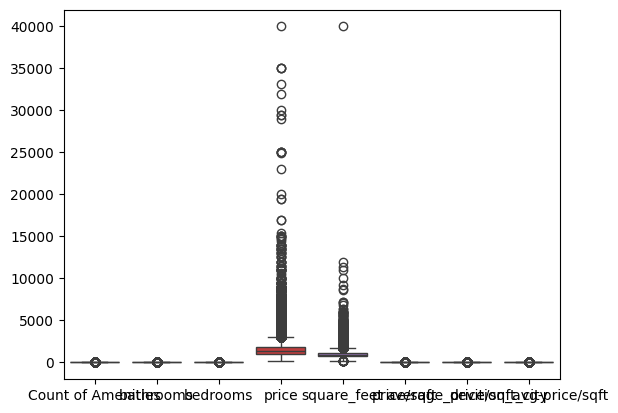

In [4]:
sns.boxplot(data=df)
plt.show()

### Remove Outliers

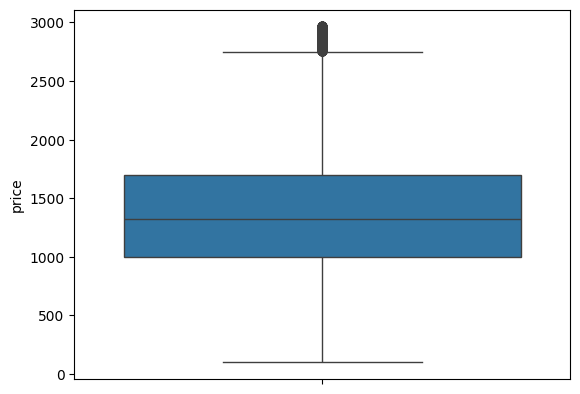

In [5]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop entire rows where 'price' is an outlier
df = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)].reset_index(drop=True)

# Plot boxplot
sns.boxplot(data=df, y="price")
plt.show()

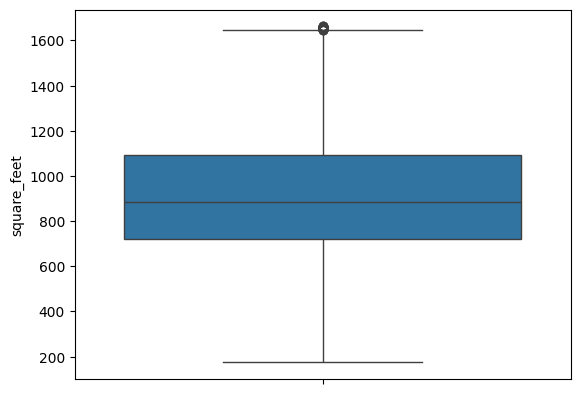

In [6]:
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop entire rows where 'price' is an outlier
df = df[(df['square_feet'] > lower_bound) & (df['square_feet'] < upper_bound)].reset_index(drop=True)

# Plot boxplot
sns.boxplot(data=df, y="square_feet")
plt.show()

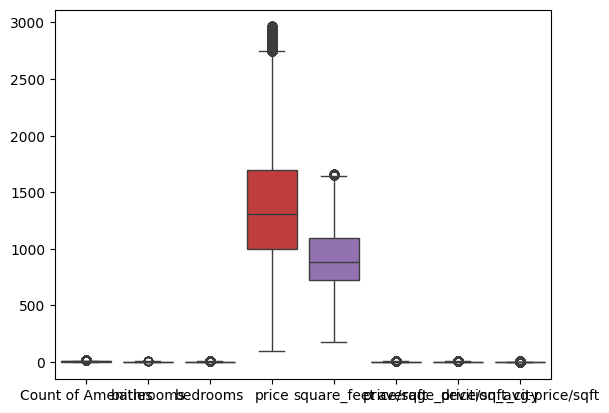

In [7]:
sns.boxplot(data=df)
plt.show()

### Label Encoding for Categorical Columns

In [8]:
df['costRange'] = df['Cost of the City'].replace({'Low Cost': 1, 'Mid-range Cost': 2, 'High Cost': 3})
df['costSqrtft'] = df['Cost sqft of the City'].replace({'Low Cost': 1, 'Mid-range Cost': 2, 'High Cost': 3})
df['fee'] = df['fee'].replace({"No": 0, "Yes": 1})
df['allowedPets'] = df['Pets Yes/NO'].replace({"No": 0, "Yes": 1})
df = df.drop(columns=["Pets Yes/NO", "Cost of the City", 'Cost sqft of the City', 'devition_avg-price/sqft'])
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets
0,0,1.0,1,0,2195.0,542,4.049815,3.638827,3,3,1
1,0,1.5,3,0,1250.0,1500,0.833333,1.188008,2,1,1
2,0,2.0,3,0,1395.0,1650,0.845455,1.373380,2,2,0
3,0,1.0,2,0,1600.0,820,1.951220,2.059047,3,3,1
4,0,1.0,1,0,975.0,624,1.562500,1.389053,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,0,780.0,605,1.289256,1.301306,2,2,0
92521,13,2.0,2,0,813.0,921,0.882736,1.329440,2,2,1
92522,2,1.0,1,0,1325.0,650,2.038462,2.732025,3,3,1
92523,2,1.0,1,0,931.0,701,1.328103,1.203260,2,1,1


### Add Column: Standard Deviation to avg price/sqft

In [9]:
df['std_avg-price/sqft'] = np.sqrt((df['price/sqft'] - df['average_price/sqft_city'])**2)

### Price Distribution Histogram

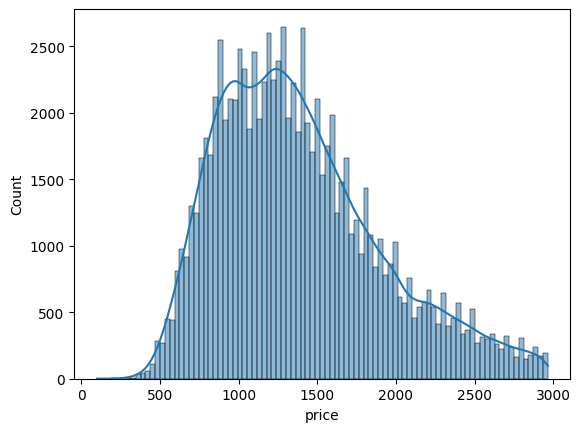

In [10]:
sns.histplot(data=df, x="price", kde=True)
plt.show()

### Binning Target Variable into Categorical Bins

In [11]:
bins = [0, 1000, 2000, 3000]  # Chia thành 5 bin đều
labels = ['Low', 'Medium', 'High']
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=labels, right=True)

df['price_bins'] = pd.Categorical(df['price_bins']).codes
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets,std_avg-price/sqft,price_bins
0,0,1.0,1,0,2195.0,542,4.049815,3.638827,3,3,1,0.410989,2
1,0,1.5,3,0,1250.0,1500,0.833333,1.188008,2,1,1,0.354675,1
2,0,2.0,3,0,1395.0,1650,0.845455,1.373380,2,2,0,0.527926,1
3,0,1.0,2,0,1600.0,820,1.951220,2.059047,3,3,1,0.107828,1
4,0,1.0,1,0,975.0,624,1.562500,1.389053,1,2,1,0.173447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,6,1.0,1,0,780.0,605,1.289256,1.301306,2,2,0,0.012050,0
92521,13,2.0,2,0,813.0,921,0.882736,1.329440,2,2,1,0.446704,0
92522,2,1.0,1,0,1325.0,650,2.038462,2.732025,3,3,1,0.693563,1
92523,2,1.0,1,0,931.0,701,1.328103,1.203260,2,1,1,0.124843,0


### Pearson's Coefficients

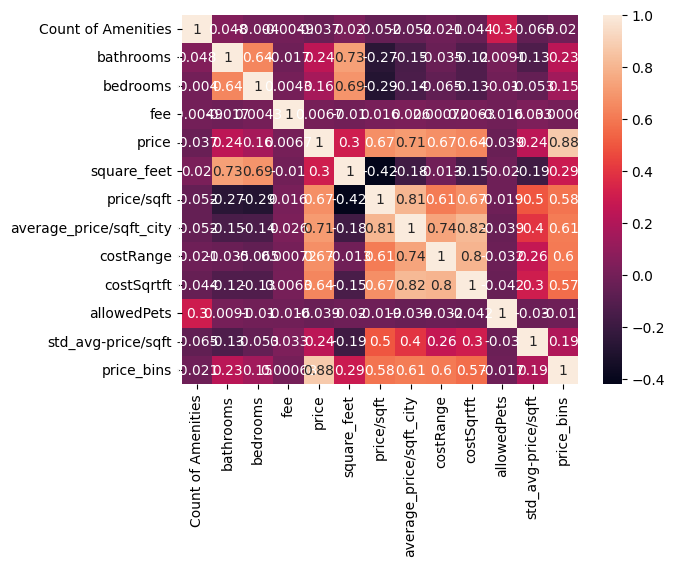

In [12]:
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()

### Scaling Numeric Columns

In [13]:
from sklearn.preprocessing import StandardScaler

# Giả sử df là DataFrame của bạn
# Tạo danh sách các cột số liệu, bỏ qua cột 'price_bins'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Tạo scaler
scaler = StandardScaler()

# Chỉ scale các cột số liệu
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Hiển thị DataFrame đã được scale
df

,Count of Amenities,bathrooms,bedrooms,fee,price,square_feet,price/sqft,average_price/sqft_city,costRange,costSqrtft,allowedPets,std_avg-price/sqft,price_bins
0,-1.122822,-0.799969,-0.983353,0,1.536910,-1.443309,3.410011,3.382088,3,3,1,0.399766,2
1,-1.122822,0.200438,1.972233,0,-0.270038,2.335197,-1.097339,-0.720720,2,1,1,0.219349,1
2,-1.122822,1.200845,1.972233,0,0.007219,2.926821,-1.080354,-0.410397,2,2,0,0.774402,1
3,-1.122822,-0.799969,0.494440,0,0.399202,-0.346832,0.469187,0.737448,3,3,1,-0.571488,1
4,-1.122822,-0.799969,-0.983353,0,-0.795869,-1.119888,-0.075537,-0.384160,1,2,1,-0.361260,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92520,0.680772,-0.799969,-0.983353,0,-1.168732,-1.194827,-0.458441,-0.531053,2,2,0,-0.878338,0
92521,2.784964,1.200845,0.494440,0,-1.105632,0.051528,-1.028110,-0.483955,2,2,1,0.514188,0
92522,-0.521624,-0.799969,-0.983353,0,-0.126629,-1.017340,0.591442,1.864051,3,3,1,1.305066,1
92523,-0.521624,-0.799969,-0.983353,0,-0.880002,-0.816187,-0.404005,-0.695188,2,1,1,-0.516975,0


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop(columns=['price_bins','price', 'price/sqft', 'average_price/sqft_city'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Regression Models

### Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_scores = []
mean_squared_error_scores = []
for depth in range(1, 21):
#Train regressor
    random_model = RandomForestRegressor(max_depth=depth, random_state=0)
    random_model.fit(X_train, y_train)
    random_y_pred = random_model.predict(X_test)
    
    #Test score
    r2 = r2_score(y_test, random_y_pred)
    mse_score  = mean_squared_error(y_test, random_y_pred)
    r2_scores.append(r2)
    mean_squared_error_scores.append(mse_score)

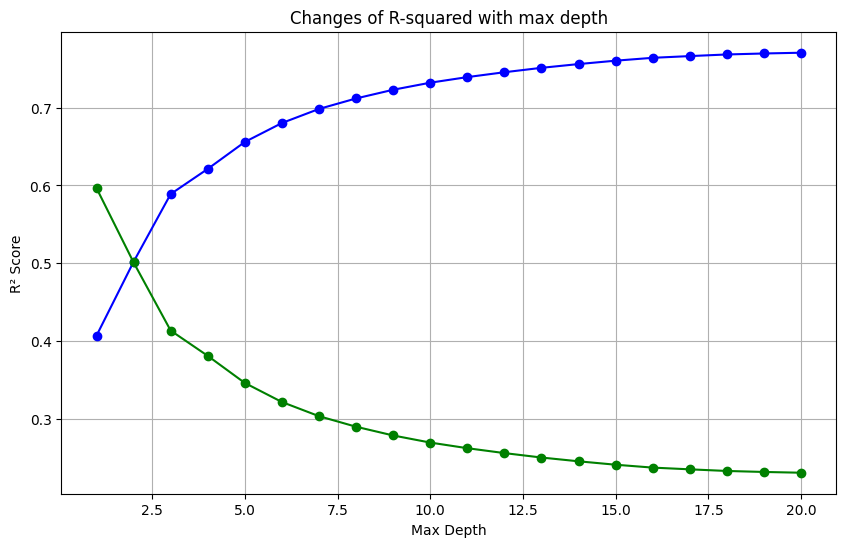

In [16]:
#R-squared with max-depth
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), r2_scores, marker='o', linestyle='-', color='b')
plt.plot(range(1, 21), mean_squared_error_scores, marker='o', linestyle='-', color='green')
plt.title("Changes of R-squared with max depth")
plt.xlabel("Max Depth")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

### Linear - Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

k = [1, 2, 3, 4]
r2_list = []
rmse_list = []

def poly_regression():
    for i in k:
        # Create polynomial features of degree i
        poly_model = PolynomialFeatures(i)
        
        # Transform the features (X_train) into polynomial features
        X_poly_train = poly_model.fit_transform(X_train)
        
        # Fit a linear regression model on the polynomial features
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        
        # Transform the X_test data into polynomial features using the same transformer
        X_poly_test = poly_model.transform(X_test)
        
        # Make predictions on the test data
        y_pred = model.predict(X_poly_test)
        
        # Calculate R-squared (r²) for the test set
        r2 = r2_score(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2_list.append(r2)
        rmse_list.append(rmse)
        print(f"Degree {i} Polynomial - R²: {r2} - RMSE: {rmse}")

In [18]:
r2_list = poly_regression()

Degree 1 Polynomial - R²: 0.6274459094933915 - RMSE: 0.6121575483225979
Degree 2 Polynomial - R²: 0.6724450443175389 - RMSE: 0.5739983290430888
Degree 3 Polynomial - R²: 0.6837401769142304 - RMSE: 0.5640148682446101
Degree 4 Polynomial - R²: -7.590865247560151 - RMSE: 2.939591577727537


## Classification Models

In [24]:
df['fee'] = pd.to_numeric(df['fee'], errors='coerce')
df['costRange'] = pd.to_numeric(df['costRange'], errors='coerce')
df['costSqrtft'] = pd.to_numeric(df['costSqrtft'], errors='coerce')
df['allowedPets'] = pd.to_numeric(df['allowedPets'], errors='coerce')

In [25]:
y = df['price_bins']
X = df.drop(columns=['price_bins','price', 'price/sqft', 'average_price/sqft_city'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
df['price_bins'].value_counts(normalize=True) * 100

price_bins
1    60.646312
0    26.115104
2    13.238584
Name: proportion, dtype: float64

In [27]:
df.dtypes

Count of Amenities         float64
bathrooms                  float64
bedrooms                   float64
fee                          int64
price                      float64
square_feet                float64
price/sqft                 float64
average_price/sqft_city    float64
costRange                    int64
costSqrtft                   int64
allowedPets                  int64
std_avg-price/sqft         float64
price_bins                    int8
dtype: object

### XGBoost Classifier

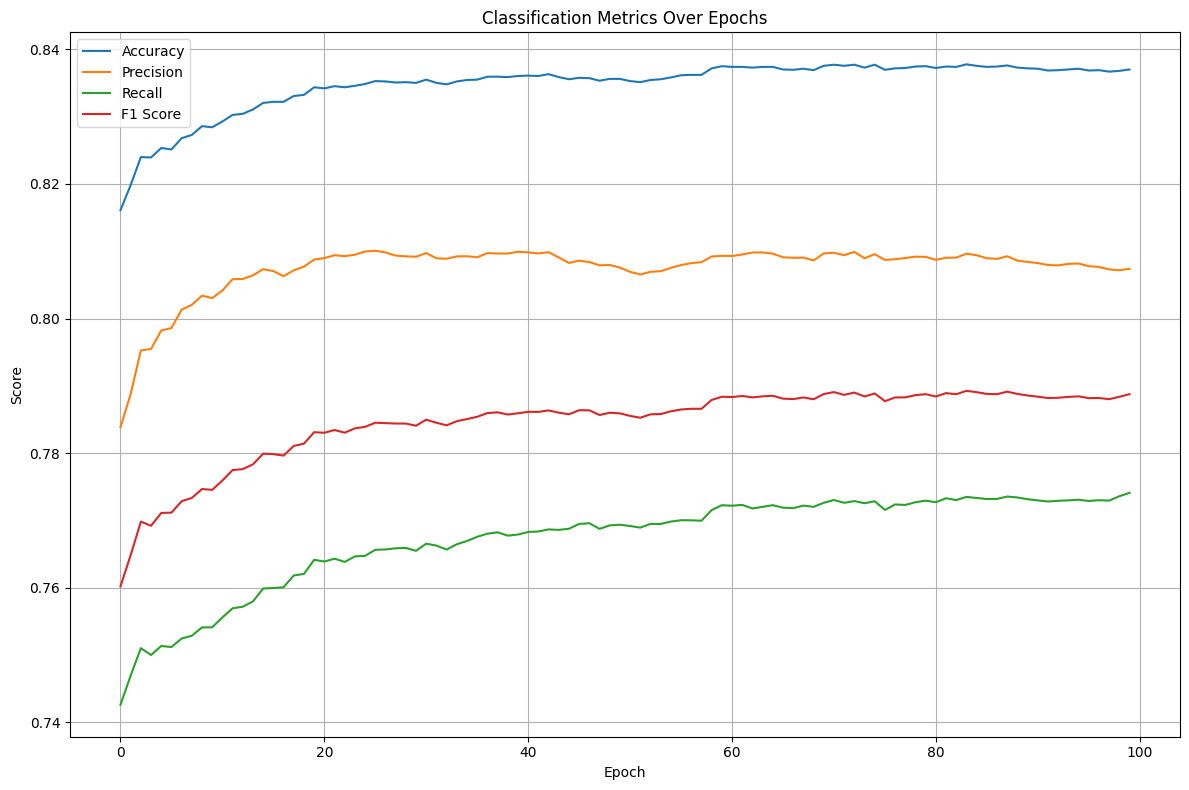

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

# DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Params
num_class = len(np.unique(y_train))
param = {
    'max_depth': 15,
    'eta': 0.2,
    'objective': 'multi:softprob',
    'num_class': num_class,
    'eval_metric': 'mlogloss',
    'nthread': 4
}

evals_result = {}
epochs = 100
eval_metric_train = []
eval_metric_test = []
acc_list = []
prec_list = []
rec_list = []
f1_list = []

bst = None

for i in range(epochs):
    bst = xgb.train(
        params=param,
        dtrain=dtrain,
        num_boost_round=1,
        xgb_model=bst,
        evals=[(dtest, 'eval'), (dtrain, 'train')],
        evals_result=evals_result,
        verbose_eval=False
    )
    
    # Prediction
    y_pred_prob = bst.predict(dtest)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

# Plotting metrics
plt.figure(figsize=(12, 8))
plt.plot(acc_list, label='Accuracy')
plt.plot(prec_list, label='Precision')
plt.plot(rec_list, label='Recall')
plt.plot(f1_list, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Classification Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


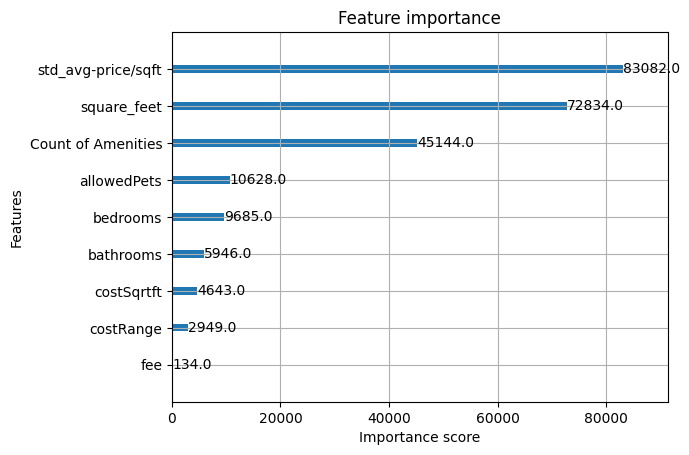

In [29]:
xgb.plot_importance(bst, max_num_features=10)
plt.show()